# Scoring a model on a Task B dataset, fitted on Task A dataset





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import glob

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/features_taskb/result.csv',index_col=[0])

In [ ]:
df

,Nav/Raw.X[RightCheek]_mean,Nav/Raw.X[RightCheek]_std,Nav/Raw.X[RightCheek]_min_,Nav/Raw.X[RightCheek]_max_,Nav/Raw.X[RightCheek]_range_,Nav/Raw.X[RightCheek]_iqr,Nav/Raw.X[RightCheek]_kurtosis,Nav/Raw.X[RightCheek]_skewness,Nav/Raw.X[RightCheek]_rms,Nav/Raw.Y[RightCheek]_mean,...,Prox/Raw[LeftCheek]_std,Prox/Raw[LeftCheek]_min_,Prox/Raw[LeftCheek]_max_,Prox/Raw[LeftCheek]_range_,Prox/Raw[LeftCheek]_iqr,Prox/Raw[LeftCheek]_kurtosis,Prox/Raw[LeftCheek]_skewness,Prox/Raw[LeftCheek]_rms,Label,FileId
0,1.161789,0.013268,1.146034,1.186698,0.040664,0.023819,-1.099109,0.383375,1.161865,2.347599,...,0.006692,0.910076,0.934514,0.024438,0.012252,-1.116658,-0.261660,0.925071,neutral,0
1,1.170971,0.015568,1.146034,1.197692,0.051659,0.025621,-1.161798,0.083202,1.171074,2.353774,...,0.006163,0.910076,0.934514,0.024438,0.009317,-0.648856,0.484894,0.922422,neutral,0
2,1.181609,0.015521,1.157029,1.204343,0.047314,0.028760,-1.373486,0.008466,1.181711,2.352999,...,0.003812,0.910076,0.928820,0.018744,0.002672,1.304087,0.578205,0.919343,neutral,0
3,1.190956,0.014049,1.167509,1.210380,0.042870,0.025365,-1.273589,-0.338018,1.191039,2.349553,...,0.002263,0.910076,0.921606,0.011529,0.002408,2.277726,-1.143697,0.917384,neutral,0
4,1.198325,0.010126,1.175406,1.210380,0.034974,0.016080,-0.650981,-0.788129,1.198368,2.345920,...,0.002642,0.914351,0.928226,0.013875,0.002533,6.469843,2.111412,0.917981,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183769,-2.000474,0.048074,-2.037821,-1.870405,0.167416,0.043178,1.118882,1.566707,2.001052,0.062767,...,0.005197,-0.642866,-0.624412,0.018454,0.007044,-0.640041,-0.752143,0.631986,neutral,58
183770,-1.989905,0.057664,-2.037821,-1.855048,0.182773,0.059186,-0.224888,1.119873,1.990740,0.043004,...,0.007584,-0.643957,-0.611042,0.032915,0.011382,0.399859,0.461958,0.632486,neutral,58
183771,-1.971478,0.060928,-2.037821,-1.855048,0.182773,0.112349,-1.144223,0.575649,1.972419,0.004511,...,0.008153,-0.644637,-0.611042,0.033594,0.012347,0.570945,0.909235,0.634938,neutral,58
183772,-1.976536,0.065066,-2.061803,-1.855048,0.206755,0.113255,-1.181786,0.516532,1.977607,-0.012029,...,0.009507,-0.656932,-0.611042,0.045890,0.008331,1.225116,0.937588,0.639078,neutral,58


In [ ]:
#Checking for null values
missing_values = df.isnull().sum()
print(f"Number of missing values by column:\n{missing_values}")

Number of missing values by column:
Nav/Raw.X[RightCheek]_mean      0
Nav/Raw.X[RightCheek]_std       0
Nav/Raw.X[RightCheek]_min_      0
Nav/Raw.X[RightCheek]_max_      0
Nav/Raw.X[RightCheek]_range_    0
                               ..
Prox/Raw[LeftCheek]_kurtosis    0
Prox/Raw[LeftCheek]_skewness    0
Prox/Raw[LeftCheek]_rms         0
Label                           0
FileId                          0
Length: 164, dtype: int64


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.value_counts('Label')

Label
neutral          105928
smile             19844
frown             19637
eyebrow_raise     19308
squeezed_eyes     19057
dtype: int64

In [ ]:
import random

In [ ]:
all_subjects=list(range(1,60))

In [ ]:
random.shuffle(all_subjects)

In [ ]:
# 40/10/9 train test validation split
train_ids=all_subjects[:40]
test_ids=all_subjects[40:50]
validation_ids=all_subjects[50:59]

In [ ]:
train_df=df[df['FileId'].isin(train_ids)]
test_df=df[df['FileId'].isin(test_ids)]
validation_df=df[df['FileId'].isin(validation_ids)]

In [ ]:
def undersample_neutral(df, factor):
    df_neutral = df.loc[df.Label == 'neutral'].iloc[::factor, :]
    df = df.loc[df.Label != 'neutral']
    df = pd.concat([df, df_neutral], axis=0)
    return df

In [ ]:
#undersampling only the train set
undersampled_train_df=pd.DataFrame()
undersampled_train_df=undersample_neutral(train_df,5)

In [ ]:
undersampled_train_df.value_counts('Label')

Label
neutral          14882
smile            13569
frown            13530
eyebrow_raise    13266
squeezed_eyes    13178
dtype: int64

In [ ]:
X_train=undersampled_train_df.drop(['Label','FileId'],axis=1)
y_train=undersampled_train_df['Label']

X_test=test_df.drop(['Label','FileId'],axis=1)
y_test=test_df['Label']

X_val=validation_df.drop(['Label','FileId'],axis=1)
y_val=validation_df['Label']

In [ ]:
import joblib

In [ ]:
rf=joblib.load('/content/drive/MyDrive/rf_500.sav')

In [ ]:
result_rf = rf.score(X_test, y_test)
print(result_rf)

0.8677709689774032


In [ ]:
xgb=joblib.load('/content/drive/MyDrive/xgb_500.sav')

In [ ]:
df.columns = df.columns.str.replace('[', '(').str.replace(']', ')')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [ ]:
result_xgb=xgb.score(X_test,y_test)
print(result_xgb)

0.8812715434699349


# Training a model on a Task A + Task B dataset

First creating a joint dataframe, from the Task A and the Task B filtered, calculated features

In [ ]:
folders_taskA=glob.glob('/content/drive/MyDrive/filtered_500/*')

In [ ]:
names_taskA=[]

In [ ]:
for folder in folders_taskA:
  parts=folder.split('/')
  name=parts[-1]
  names_taskA.append(name)

In [ ]:
names_taskA.remove('result.csv')
len(names_taskA)

65

In [ ]:
calculated_taskA=glob.glob('/content/drive/MyDrive/filtered_500/*/calculated_features.csv')

In [ ]:
folders_taskB=glob.glob('/content/drive/MyDrive/features_taskb/*')

In [ ]:
names_taskB=[]

In [ ]:
for folder in folders_taskB:
  parts=folder.split('/')
  name=parts[-1]
  names_taskB.append(name)

In [ ]:
names_taskB.remove('result.csv')
len(names_taskB)

59

In [ ]:
calculated_taskB=glob.glob('/content/drive/MyDrive/features_taskb/*/calculated_features.csv')

In [ ]:
#combining the names lists without duplicates
names_combined=list(set(names_taskA + names_taskB))

In [ ]:
names_combined.sort()

In [ ]:
len(names_combined)

68

In [ ]:
names_dict={}

In [ ]:
for index, name in enumerate(names_combined):
  names_dict[name]=index

In [ ]:
result=pd.DataFrame()

In [ ]:
#all of the calculated features from both tasks
files=calculated_taskA+calculated_taskB

In [ ]:
for file in files:
  df=pd.read_csv(file)
  parts=file.split('/')
  name=parts[-2]
  df['FileId']=names_dict[name]
  result=pd.concat([result,df],axis=0).reset_index(drop=True)

In [ ]:
result

,Nav/Raw.X[RightCheek]_mean,Nav/Raw.X[RightCheek]_std,Nav/Raw.X[RightCheek]_min_,Nav/Raw.X[RightCheek]_max_,Nav/Raw.X[RightCheek]_range_,Nav/Raw.X[RightCheek]_iqr,Nav/Raw.X[RightCheek]_kurtosis,Nav/Raw.X[RightCheek]_skewness,Nav/Raw.X[RightCheek]_rms,Nav/Raw.Y[RightCheek]_mean,...,Prox/Raw[LeftCheek]_std,Prox/Raw[LeftCheek]_min_,Prox/Raw[LeftCheek]_max_,Prox/Raw[LeftCheek]_range_,Prox/Raw[LeftCheek]_iqr,Prox/Raw[LeftCheek]_kurtosis,Prox/Raw[LeftCheek]_skewness,Prox/Raw[LeftCheek]_rms,Label,FileId
0,1.192156,0.077390,1.060395,1.323887,0.263492,0.113806,-1.152773,0.210310,1.194665,-0.300051,...,0.081483,3.108834,3.349678,0.240845,0.061842,-0.587867,0.969505,3.196034,neutral,0
1,1.153786,0.132542,0.861667,1.323887,0.462221,0.142413,-0.437263,-0.738305,1.161374,-0.195903,...,0.089348,3.108834,3.349678,0.240845,0.190429,-1.587034,0.329223,3.218957,neutral,0
2,1.058085,0.163610,0.794020,1.289034,0.495014,0.295620,-1.371567,-0.339156,1.070660,-0.213663,...,0.128636,2.917786,3.349678,0.431892,0.205156,-0.842719,-0.297132,3.186437,neutral,0
3,0.996057,0.134400,0.794020,1.213684,0.419664,0.253627,-1.411802,0.067908,1.005084,-0.283364,...,0.204233,2.765285,3.349678,0.584393,0.379452,-1.170319,-0.465728,3.124522,neutral,0
4,0.940828,0.105722,0.794020,1.144590,0.350570,0.120380,-0.610440,0.650154,0.946750,-0.466014,...,0.247919,2.730801,3.349678,0.618877,0.552836,-1.702184,0.088022,3.044532,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391130,0.322789,1.278603,-1.339922,2.406812,3.746734,2.097422,-1.195207,0.458554,1.318719,-0.817331,...,0.068826,-1.008502,-0.797106,0.211397,0.134027,-1.546083,-0.013367,0.900467,neutral,67
391131,-0.427204,0.931623,-1.469874,1.840298,3.310172,1.375048,-0.280373,0.798368,1.024902,0.111488,...,0.075694,-1.010354,-0.797106,0.213248,0.154635,-1.600995,-0.060785,0.907341,neutral,67
391132,-0.969824,0.600849,-1.725323,0.265983,1.991306,0.972562,-1.010949,0.570205,1.140867,0.860179,...,0.075760,-1.010354,-0.772441,0.237913,0.151289,-1.487383,0.024200,0.908693,neutral,67
391133,-1.326958,0.438037,-1.920038,-0.361707,1.558330,0.596092,-0.446095,0.760662,1.397389,1.406912,...,0.104801,-1.010354,-0.707294,0.303060,0.174660,-1.239743,0.426012,0.890154,neutral,67


In [ ]:
result.to_csv('/content/drive/MyDrive/result_taskab.csv')

In [ ]:
result=pd.read_csv('/content/drive/MyDrive/result_taskab.csv',index_col=[0])

In [ ]:
result

,Nav/Raw.X[RightCheek]_mean,Nav/Raw.X[RightCheek]_std,Nav/Raw.X[RightCheek]_min_,Nav/Raw.X[RightCheek]_max_,Nav/Raw.X[RightCheek]_range_,Nav/Raw.X[RightCheek]_iqr,Nav/Raw.X[RightCheek]_kurtosis,Nav/Raw.X[RightCheek]_skewness,Nav/Raw.X[RightCheek]_rms,Nav/Raw.Y[RightCheek]_mean,...,Prox/Raw[LeftCheek]_std,Prox/Raw[LeftCheek]_min_,Prox/Raw[LeftCheek]_max_,Prox/Raw[LeftCheek]_range_,Prox/Raw[LeftCheek]_iqr,Prox/Raw[LeftCheek]_kurtosis,Prox/Raw[LeftCheek]_skewness,Prox/Raw[LeftCheek]_rms,Label,FileId
0,1.192156,0.077390,1.060395,1.323887,0.263492,0.113806,-1.152773,0.210310,1.194665,-0.300051,...,0.081483,3.108834,3.349678,0.240845,0.061842,-0.587867,0.969505,3.196034,neutral,0
1,1.153786,0.132542,0.861667,1.323887,0.462221,0.142413,-0.437263,-0.738305,1.161374,-0.195903,...,0.089348,3.108834,3.349678,0.240845,0.190429,-1.587034,0.329223,3.218957,neutral,0
2,1.058085,0.163610,0.794020,1.289034,0.495014,0.295620,-1.371567,-0.339156,1.070660,-0.213663,...,0.128636,2.917786,3.349678,0.431892,0.205156,-0.842719,-0.297132,3.186437,neutral,0
3,0.996057,0.134400,0.794020,1.213684,0.419664,0.253627,-1.411802,0.067908,1.005084,-0.283364,...,0.204233,2.765285,3.349678,0.584393,0.379452,-1.170319,-0.465728,3.124522,neutral,0
4,0.940828,0.105722,0.794020,1.144590,0.350570,0.120380,-0.610440,0.650154,0.946750,-0.466014,...,0.247919,2.730801,3.349678,0.618877,0.552836,-1.702184,0.088022,3.044532,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391130,0.322789,1.278603,-1.339922,2.406812,3.746734,2.097422,-1.195207,0.458554,1.318719,-0.817331,...,0.068826,-1.008502,-0.797106,0.211397,0.134027,-1.546083,-0.013367,0.900467,neutral,67
391131,-0.427204,0.931623,-1.469874,1.840298,3.310172,1.375048,-0.280373,0.798368,1.024902,0.111488,...,0.075694,-1.010354,-0.797106,0.213248,0.154635,-1.600995,-0.060785,0.907341,neutral,67
391132,-0.969824,0.600849,-1.725323,0.265983,1.991306,0.972562,-1.010949,0.570205,1.140867,0.860179,...,0.075760,-1.010354,-0.772441,0.237913,0.151289,-1.487383,0.024200,0.908693,neutral,67
391133,-1.326958,0.438037,-1.920038,-0.361707,1.558330,0.596092,-0.446095,0.760662,1.397389,1.406912,...,0.104801,-1.010354,-0.707294,0.303060,0.174660,-1.239743,0.426012,0.890154,neutral,67


In [ ]:
#Checking for null values
missing_values = result.isnull().sum()
print(f"Number of missing values by column:\n{missing_values}")

Number of missing values by column:
Nav/Raw.X[RightCheek]_mean      0
Nav/Raw.X[RightCheek]_std       0
Nav/Raw.X[RightCheek]_min_      0
Nav/Raw.X[RightCheek]_max_      0
Nav/Raw.X[RightCheek]_range_    0
                               ..
Prox/Raw[LeftCheek]_kurtosis    0
Prox/Raw[LeftCheek]_skewness    0
Prox/Raw[LeftCheek]_rms         0
Label                           0
FileId                          0
Length: 164, dtype: int64


In [ ]:
result.fillna(0,inplace=True)

In [ ]:
result.value_counts('Label')

Label
neutral          237313
smile             39304
frown             38820
eyebrow_raise     38181
squeezed_eyes     37517
dtype: int64

In [ ]:
all_subjects=list(range(1,69))

In [ ]:
random.shuffle(all_subjects)

In [ ]:
result.columns = result.columns.str.replace('[', '(').str.replace(']', ')')

In [ ]:
# 48/10/10 train test validation split
train_ids=all_subjects[:48]
test_ids=all_subjects[48:58]
validation_ids=all_subjects[58:68]

In [ ]:
train_df=result[result['FileId'].isin(train_ids)]
test_df=result[result['FileId'].isin(test_ids)]
validation_df=result[result['FileId'].isin(validation_ids)]

In [ ]:
#undersampling only the train set
undersampled_train_df=pd.DataFrame()
undersampled_train_df=undersample_neutral(train_df,6)

In [ ]:
undersampled_train_df.value_counts('Label')

Label
neutral          26137
smile            25902
frown            25666
eyebrow_raise    25306
squeezed_eyes    24629
dtype: int64

In [ ]:
X_train=undersampled_train_df.drop(['Label','FileId'],axis=1)
y_train=undersampled_train_df['Label']

X_test=test_df.drop(['Label','FileId'],axis=1)
y_test=test_df['Label']

X_val=validation_df.drop(['Label','FileId'],axis=1)
y_val=validation_df['Label']

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix

In [ ]:
dummy = DummyClassifier(strategy='uniform')
dummy.fit(X_train, y_train)

print("Score on test: {}".format(dummy.score(X_test, y_test)))

Score on test: 0.2003974070816639


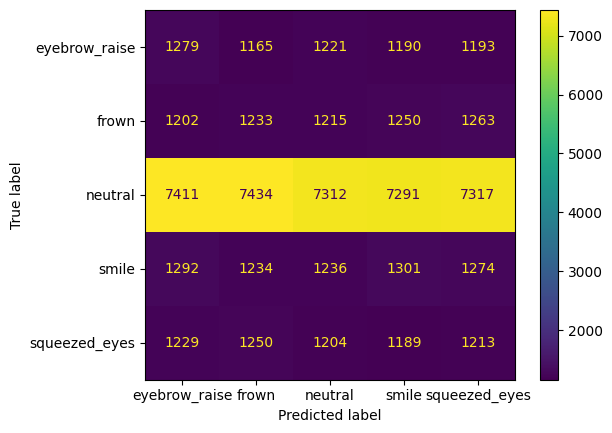

In [ ]:
cm=confusion_matrix(y_test, dummy.predict(X_test),labels=dummy.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=dummy.classes_)
disp.plot()
plt.show()

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

print("Score on test: {}".format(rf.score(X_test, y_test)))

Score on test: 0.8952554112554113


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred, target_names=result['Label'].unique()))

               precision    recall  f1-score   support

      neutral       0.79      0.83      0.81      5534
        smile       0.81      0.90      0.85      5631
        frown       0.95      0.89      0.92     35454
eyebrow_raise       0.83      0.97      0.89      5749
squeezed_eyes       0.83      0.89      0.86      5382

     accuracy                           0.90     57750
    macro avg       0.84      0.90      0.87     57750
 weighted avg       0.90      0.90      0.90     57750



In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

print("Score on test: {}".format(xgb.score(X_test, y_test)))

Score on test: 0.876380338121763


# Training a model on a Task A + Task C dataset

In [ ]:
folders_taskC=glob.glob('/content/drive/MyDrive/features_taskc/*')

In [ ]:
names_taskC=[]

In [ ]:
for folder in folders_taskC:
  parts=folder.split('/')
  name=parts[-1]
  names_taskC.append(name)

In [ ]:
len(names_taskC)

65

In [ ]:
calculated_taskC=glob.glob('/content/drive/MyDrive/features_taskc/*/calculated_features.csv')

In [ ]:
#combining the names lists without duplicates
names_combined=list(set(names_taskA + names_taskC))

In [ ]:
len(names_combined)

69

In [ ]:
names_combined.sort()

In [ ]:
names_dict={}

In [ ]:
for index, name in enumerate(names_combined):
  names_dict[name]=index

In [ ]:
#all of the calculated features from both tasks
files=calculated_taskA+calculated_taskC

In [ ]:
result=pd.DataFrame()

In [ ]:
for file in files:
  df=pd.read_csv(file)
  parts=file.split('/')
  name=parts[-2]
  df['FileId']=names_dict[name]
  result=pd.concat([result,df],axis=0).reset_index(drop=True)

In [ ]:
result=result.drop('Unnamed: 0.1', axis=1)

In [ ]:
result.to_csv('/content/drive/MyDrive/result_taskac.csv')

In [ ]:
result=pd.read_csv('/content/drive/MyDrive/result_taskac.csv', index_col=[0])

In [ ]:
result

,Nav/Raw.X[RightCheek]_mean,Nav/Raw.X[RightCheek]_std,Nav/Raw.X[RightCheek]_min_,Nav/Raw.X[RightCheek]_max_,Nav/Raw.X[RightCheek]_range_,Nav/Raw.X[RightCheek]_iqr,Nav/Raw.X[RightCheek]_kurtosis,Nav/Raw.X[RightCheek]_skewness,Nav/Raw.X[RightCheek]_rms,Nav/Raw.Y[RightCheek]_mean,...,Prox/Raw[LeftCheek]_std,Prox/Raw[LeftCheek]_min_,Prox/Raw[LeftCheek]_max_,Prox/Raw[LeftCheek]_range_,Prox/Raw[LeftCheek]_iqr,Prox/Raw[LeftCheek]_kurtosis,Prox/Raw[LeftCheek]_skewness,Prox/Raw[LeftCheek]_rms,Label,FileId
0,0.348229,0.043537,0.278892,0.438483,0.159590,0.037816,-0.501721,0.614952,0.350940,-1.127508,...,0.079755,0.832746,1.074478,0.241732,0.133732,-1.256023,0.402130,0.925127,neutral,0
1,0.337956,0.035829,0.278892,0.438483,0.159590,0.015066,1.656762,1.178269,0.339850,-1.073165,...,0.093256,0.832746,1.080728,0.247982,0.218754,-1.424616,-0.222510,0.969009,neutral,0
2,0.333375,0.024216,0.278892,0.374414,0.095522,0.018573,-0.096384,-0.415703,0.334253,-1.017790,...,0.075644,0.846374,1.085602,0.239228,0.105443,-0.251419,-0.900408,1.016723,neutral,0
3,0.352210,0.024558,0.317288,0.417429,0.100141,0.035809,0.049680,0.905545,0.353065,-0.983217,...,0.041991,0.974173,1.085602,0.111429,0.061677,-0.910704,-0.944172,1.051939,neutral,0
4,0.383455,0.057073,0.331458,0.529571,0.198113,0.057152,0.483971,1.273741,0.387679,-0.940316,...,0.022532,0.992010,1.094305,0.102295,0.007587,4.907859,-2.372198,1.072053,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420506,0.322789,1.278603,-1.339922,2.406812,3.746734,2.097422,-1.195207,0.458554,1.318719,-0.817331,...,0.068826,-1.008502,-0.797106,0.211397,0.134027,-1.546083,-0.013367,0.900467,neutral,68
420507,-0.427204,0.931623,-1.469874,1.840298,3.310172,1.375048,-0.280373,0.798368,1.024902,0.111488,...,0.075694,-1.010354,-0.797106,0.213248,0.154635,-1.600995,-0.060785,0.907341,neutral,68
420508,-0.969824,0.600849,-1.725323,0.265983,1.991306,0.972562,-1.010949,0.570205,1.140867,0.860179,...,0.075760,-1.010354,-0.772441,0.237913,0.151289,-1.487383,0.024200,0.908693,neutral,68
420509,-1.326958,0.438037,-1.920038,-0.361707,1.558330,0.596092,-0.446095,0.760662,1.397389,1.406912,...,0.104801,-1.010354,-0.707294,0.303060,0.174660,-1.239743,0.426012,0.890154,neutral,68


In [ ]:
#Checking for null values
missing_values = result.isnull().sum()
print(f"Number of missing values by column:\n{missing_values}")

Number of missing values by column:
Nav/Raw.X[RightCheek]_mean      0
Nav/Raw.X[RightCheek]_std       0
Nav/Raw.X[RightCheek]_min_      0
Nav/Raw.X[RightCheek]_max_      0
Nav/Raw.X[RightCheek]_range_    0
                               ..
Prox/Raw[LeftCheek]_kurtosis    0
Prox/Raw[LeftCheek]_skewness    0
Prox/Raw[LeftCheek]_rms         0
Label                           0
FileId                          0
Length: 164, dtype: int64


In [ ]:
result.fillna(0, inplace=True)

In [ ]:
result.value_counts('Label')

Label
neutral          274532
frown             37091
smile             36971
eyebrow_raise     36245
squeezed_eyes     35672
dtype: int64

In [ ]:
all_subjects=list(range(1,70))

In [ ]:
random.shuffle(all_subjects)

In [ ]:
result.columns = result.columns.str.replace('[', '(').str.replace(']', ')')

In [ ]:
# 49/10/10 train test validation split
train_ids=all_subjects[:49]
test_ids=all_subjects[49:59]
validation_ids=all_subjects[59:69]

In [ ]:
train_df=result[result['FileId'].isin(train_ids)]
test_df=result[result['FileId'].isin(test_ids)]
validation_df=result[result['FileId'].isin(validation_ids)]

In [ ]:
#undersampling only the train set
undersampled_train_df=pd.DataFrame()
undersampled_train_df=undersample_neutral(train_df,7)

In [ ]:
undersampled_train_df.value_counts('Label')

Label
neutral          26855
frown            25453
smile            25401
eyebrow_raise    24921
squeezed_eyes    24620
dtype: int64

In [ ]:
X_train=undersampled_train_df.drop(['Label','FileId'],axis=1)
y_train=undersampled_train_df['Label']

X_test=test_df.drop(['Label','FileId'],axis=1)
y_test=test_df['Label']

X_val=validation_df.drop(['Label','FileId'],axis=1)
y_val=validation_df['Label']

In [ ]:
dummy = DummyClassifier(strategy='uniform')
dummy.fit(X_train, y_train)

print("Score on test: {}".format(dummy.score(X_test, y_test)))

Score on test: 0.20202711303462323


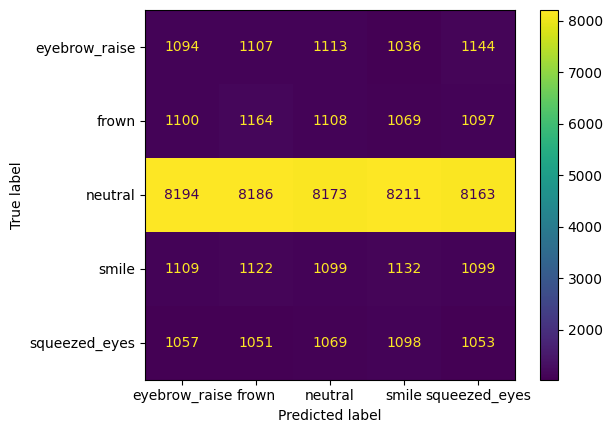

In [ ]:
cm=confusion_matrix(y_test, dummy.predict(X_test),labels=dummy.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=dummy.classes_)
disp.plot()
plt.show()

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

print("Score on test: {}".format(rf.score(X_test, y_test)))

Score on test: 0.8811895366598778


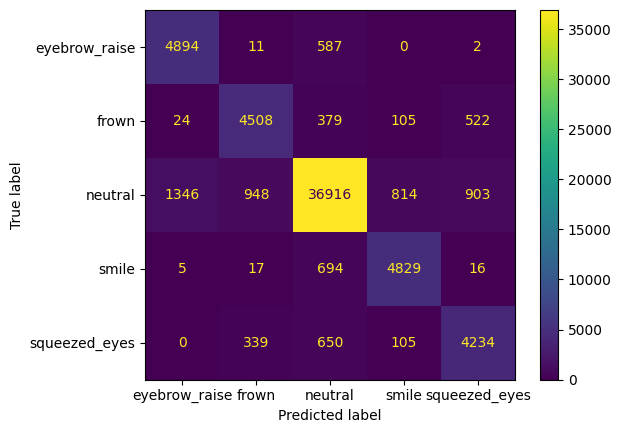

In [ ]:
cm=confusion_matrix(y_test, rf.predict(X_test),labels=rf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=rf.classes_)
disp.plot()
plt.show()

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred, target_names=result['Label'].unique()))

               precision    recall  f1-score   support

      neutral       0.78      0.89      0.83      5494
        smile       0.77      0.81      0.79      5538
        frown       0.94      0.90      0.92     40927
eyebrow_raise       0.83      0.87      0.85      5561
squeezed_eyes       0.75      0.79      0.77      5328

     accuracy                           0.88     62848
    macro avg       0.81      0.85      0.83     62848
 weighted avg       0.89      0.88      0.88     62848



In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

print("Score on test: {}".format(xgb.score(X_test, y_test)))

Score on test: 0.8869812881873728


# Training a model on a Task A + Task B + Task C dataset

In [ ]:
names_combined=list(set(names_taskA + names_taskB + names_taskC))

In [ ]:
len(names_combined)

69

In [ ]:
names_dict={}

In [ ]:
for index, name in enumerate(names_combined):
  names_dict[name]=index

In [ ]:
files=calculated_taskA + calculated_taskB + calculated_taskC

In [ ]:
files.sort()

In [ ]:
result=pd.DataFrame()

In [ ]:
for file in files:
  df=pd.read_csv(file)
  parts=file.split('/')
  name=parts[-2]
  df['FileId']=names_dict[name]
  result=pd.concat([result,df],axis=0).reset_index(drop=True)

In [ ]:
result.to_csv('/content/drive/MyDrive/result_all.csv')

In [ ]:
result=pd.read_csv('/content/drive/MyDrive/result_all.csv', index_col=[0])

In [ ]:
#Checking for null values
missing_values = result.isnull().sum()
print(f"Number of missing values by column:\n{missing_values}")

Number of missing values by column:
Nav/Raw.X[RightCheek]_mean      0
Nav/Raw.X[RightCheek]_std       0
Nav/Raw.X[RightCheek]_min_      0
Nav/Raw.X[RightCheek]_max_      0
Nav/Raw.X[RightCheek]_range_    0
                               ..
Prox/Raw[LeftCheek]_kurtosis    0
Prox/Raw[LeftCheek]_skewness    0
Prox/Raw[LeftCheek]_rms         0
Label                           0
FileId                          0
Length: 164, dtype: int64


In [ ]:
result.fillna(0, inplace=True)

In [ ]:
result.value_counts('Label')

Label
neutral          380460
smile             56815
frown             56728
eyebrow_raise     55553
squeezed_eyes     54729
dtype: int64

In [ ]:
all_subjects=list(range(1,70))

In [ ]:
random.shuffle(all_subjects)

In [ ]:
result.columns = result.columns.str.replace('[', '(').str.replace(']', ')')

In [ ]:
# 49/10/10 train test validation split
train_ids=all_subjects[:49]
test_ids=all_subjects[49:59]
validation_ids=all_subjects[59:69]

In [ ]:
train_df=result[result['FileId'].isin(train_ids)]
test_df=result[result['FileId'].isin(test_ids)]
validation_df=result[result['FileId'].isin(validation_ids)]

In [ ]:
#undersampling only the train set
undersampled_train_df=pd.DataFrame()
undersampled_train_df=undersample_neutral(train_df,7)

In [ ]:
undersampled_train_df.value_counts('Label')

Label
smile            39122
frown            39101
eyebrow_raise    38490
squeezed_eyes    38123
neutral          37675
dtype: int64

In [ ]:
X_train=undersampled_train_df.drop(['Label','FileId'],axis=1)
y_train=undersampled_train_df['Label']

X_test=test_df.drop(['Label','FileId'],axis=1)
y_test=test_df['Label']

X_val=validation_df.drop(['Label','FileId'],axis=1)
y_val=validation_df['Label']

In [ ]:
dummy = DummyClassifier(strategy='uniform')
dummy.fit(X_train, y_train)

print("Score on test: {}".format(dummy.score(X_test, y_test)))

Score on test: 0.20124405007413024


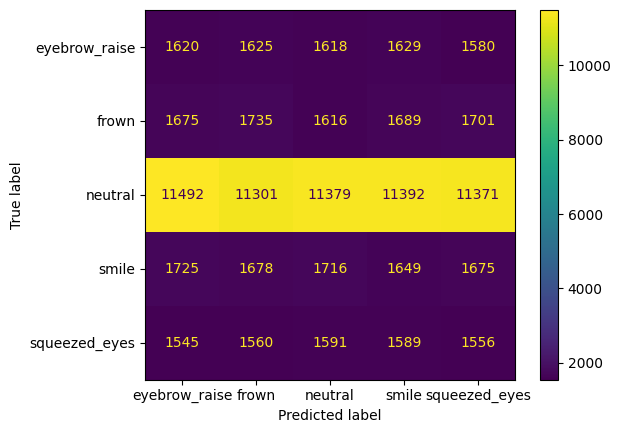

In [ ]:
cm=confusion_matrix(y_test, dummy.predict(X_test),labels=dummy.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=dummy.classes_)
disp.plot()
plt.show()

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

print("Score on test: {}".format(rf.score(X_test, y_test)))

Score on test: 0.897666848740901


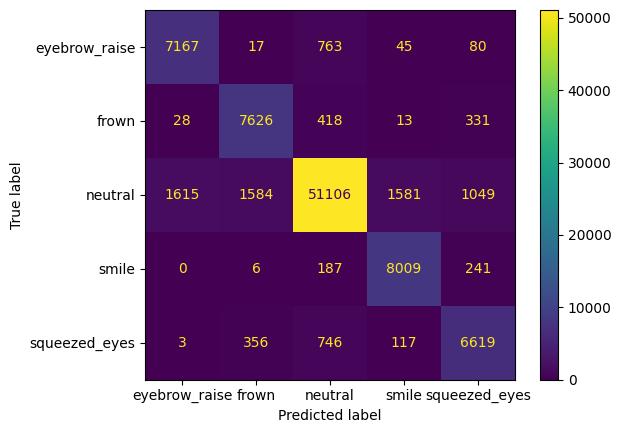

In [ ]:
cm=confusion_matrix(y_test, rf.predict(X_test),labels=rf.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=rf.classes_)
disp.plot()
plt.show()

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred, target_names=result['Label'].unique()))

               precision    recall  f1-score   support

      neutral       0.81      0.89      0.85      8072
        smile       0.80      0.91      0.85      8416
        frown       0.96      0.90      0.93     56935
eyebrow_raise       0.82      0.95      0.88      8443
squeezed_eyes       0.80      0.84      0.82      7841

     accuracy                           0.90     89707
    macro avg       0.84      0.90      0.86     89707
 weighted avg       0.90      0.90      0.90     89707



In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)

print("Score on test: {}".format(xgb.score(X_test, y_test)))

Score on test: 0.9058490418807896


# Scoring a model on a Task C dataset, fitted on Task A dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/features_taskc/result.csv',index_col=[0])

In [ ]:
df

,Nav/Raw.X[RightCheek]_mean,Nav/Raw.X[RightCheek]_std,Nav/Raw.X[RightCheek]_min_,Nav/Raw.X[RightCheek]_max_,Nav/Raw.X[RightCheek]_range_,Nav/Raw.X[RightCheek]_iqr,Nav/Raw.X[RightCheek]_kurtosis,Nav/Raw.X[RightCheek]_skewness,Nav/Raw.X[RightCheek]_rms,Nav/Raw.Y[RightCheek]_mean,...,Prox/Raw[LeftCheek]_std,Prox/Raw[LeftCheek]_min_,Prox/Raw[LeftCheek]_max_,Prox/Raw[LeftCheek]_range_,Prox/Raw[LeftCheek]_iqr,Prox/Raw[LeftCheek]_kurtosis,Prox/Raw[LeftCheek]_skewness,Prox/Raw[LeftCheek]_rms,Label,FileId
0,0.699789,0.003589,0.686201,0.704771,0.018569,0.003215,5.897146,-2.197705,0.699799,1.032500,...,0.011299,0.398617,0.452917,0.054300,0.013570,4.355450,1.813114,0.412090,neutral,0
1,0.694152,0.010741,0.665693,0.701605,0.035912,0.007754,0.556639,-1.419756,0.694235,1.034001,...,0.022791,0.398617,0.469911,0.071294,0.013570,-0.385264,1.132580,0.420264,neutral,0
2,0.685042,0.017948,0.652996,0.701605,0.048609,0.028637,-1.137321,-0.682148,0.685277,1.036168,...,0.043255,0.398617,0.548658,0.150041,0.057905,0.367003,1.157911,0.438417,neutral,0
3,0.675738,0.019088,0.649795,0.701183,0.051389,0.040815,-1.675486,0.076587,0.676008,1.040126,...,0.075468,0.398617,0.632710,0.234093,0.129966,-0.645807,0.787641,0.481008,neutral,0
4,0.663102,0.021207,0.621052,0.701087,0.080035,0.024523,-0.577185,0.130209,0.663441,1.044938,...,0.104858,0.398617,0.723509,0.324891,0.168318,-1.110150,0.423906,0.542384,neutral,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213145,-2.996736,0.051023,-3.058574,-2.885388,0.173185,0.076641,-0.672668,0.736812,2.997170,2.748502,...,0.033122,-0.380764,-0.279766,0.100998,0.065844,-1.333831,0.129903,0.338790,neutral,64
213146,-3.025354,0.032941,-3.059839,-2.938335,0.121504,0.040861,0.300536,1.018227,3.025533,2.783542,...,0.025958,-0.380885,-0.304085,0.076800,0.046308,-1.197679,0.554518,0.355793,neutral,64
213147,-3.046876,0.022171,-3.084463,-3.008746,0.075717,0.030412,-1.078552,0.070894,3.046956,2.810649,...,0.018671,-0.393012,-0.328772,0.064239,0.021842,-0.416227,0.944372,0.370095,neutral,64
213148,-3.061466,0.020264,-3.093469,-3.027133,0.066335,0.034460,-1.121806,0.121328,3.061533,2.832684,...,0.012005,-0.395707,-0.348437,0.047270,0.015141,1.309377,1.159719,0.380694,neutral,64


In [ ]:
#Checking for null values
missing_values = df.isnull().sum()
print(f"Number of missing values by column:\n{missing_values}")

Number of missing values by column:
Nav/Raw.X[RightCheek]_mean      0
Nav/Raw.X[RightCheek]_std       0
Nav/Raw.X[RightCheek]_min_      0
Nav/Raw.X[RightCheek]_max_      0
Nav/Raw.X[RightCheek]_range_    0
                               ..
Prox/Raw[LeftCheek]_kurtosis    0
Prox/Raw[LeftCheek]_skewness    0
Prox/Raw[LeftCheek]_rms         0
Label                           0
FileId                          0
Length: 164, dtype: int64


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.value_counts('Label')

Label
neutral          143147
frown             17908
smile             17511
eyebrow_raise     17372
squeezed_eyes     17212
dtype: int64

In [ ]:
all_subjects=list(range(1,66))

In [ ]:
random.shuffle(all_subjects)

In [ ]:
# 45/10/10 train test validation split
train_ids=all_subjects[:45]
test_ids=all_subjects[45:55]
validation_ids=all_subjects[55:65]

In [ ]:
train_df=df[df['FileId'].isin(train_ids)]
test_df=df[df['FileId'].isin(test_ids)]
validation_df=df[df['FileId'].isin(validation_ids)]

In [ ]:
#undersampling only the train set
undersampled_train_df=pd.DataFrame()
undersampled_train_df=undersample_neutral(train_df,8)

In [ ]:
undersampled_train_df.value_counts('Label')

Label
neutral          12190
frown            12020
smile            11792
eyebrow_raise    11679
squeezed_eyes    11580
dtype: int64

In [ ]:
X_train=undersampled_train_df.drop(['Label','FileId'],axis=1)
y_train=undersampled_train_df['Label']

X_test=test_df.drop(['Label','FileId'],axis=1)
y_test=test_df['Label']

X_val=validation_df.drop(['Label','FileId'],axis=1)
y_val=validation_df['Label']

In [ ]:
rf=joblib.load('/content/drive/MyDrive/rf_500.sav')

In [ ]:
result_rf = rf.score(X_test, y_test)
print(result_rf)

0.8526791606176587


In [ ]:
xgb=joblib.load('/content/drive/MyDrive/xgb_500.sav')

In [ ]:
df.columns = df.columns.str.replace('[', '(').str.replace(']', ')')

<ipython-input-175-6e916e3d41d7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('[', '(').str.replace(']', ')')
<ipython-input-175-6e916e3d41d7>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('[', '(').str.replace(']', ')')


In [ ]:
train_df=df[df['FileId'].isin(train_ids)]
test_df=df[df['FileId'].isin(test_ids)]
validation_df=df[df['FileId'].isin(validation_ids)]

In [ ]:
#undersampling only the train set
undersampled_train_df=pd.DataFrame()
undersampled_train_df=undersample_neutral(train_df,8)

In [ ]:
X_train=undersampled_train_df.drop(['Label','FileId'],axis=1)
y_train=undersampled_train_df['Label']

X_test=test_df.drop(['Label','FileId'],axis=1)
y_test=test_df['Label']

X_val=validation_df.drop(['Label','FileId'],axis=1)
y_val=validation_df['Label']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [ ]:
result_xgb=xgb.score(X_test,y_test)
print(result_xgb)

0.8566385112841494
